#  **Project Title:**

"Predictive Analysis of Heart Disease Using Medical Data"
# **Problem Statement:**
"Develop a predictive model to determine whether an individual is at risk of heart disease based on a set of medical features".


# **1.Understand The Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#  **Features:**

**age**: Age of the patient.

**sex**: Gender (1 = male, 0 = female).

**cp**: Chest pain type (categorical).

**trestbps**: Resting blood pressure (in mm Hg).

**chol**: Serum cholesterol (in mg/dl).

**fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).

**restecg**: Resting electrocardiographic results (categorical).

**thalach**: Maximum heart rate achieved.

**exang**: Exercise-induced angina (1 = yes, 0 = no).

**oldpeak**: ST depression induced by exercise.

**slope**: Slope of the peak exercise ST segment.

**ca**: Number of major vessels (0-3) colored by fluoroscopy.

**thal**: Thalassemia (categorical).

**target**: Presence of heart disease (1 = disease present, 0 = no disease).


# **Objectives**:
develop a predictive model to determine whether an individual is at risk of heart disease


In [ ]:
df=pd.read_csv("heart.csv")

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


* check information of DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


* checks for duplicate rows in the DataFrame

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


* Check for any missing values:

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **3.Data Descriptive**
* To quickly get a summary of important statistical details about the numeric columns in a DataFrame.


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **4.Data Visualization**
* A histogram is used to show the distribution of data in a dataset.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

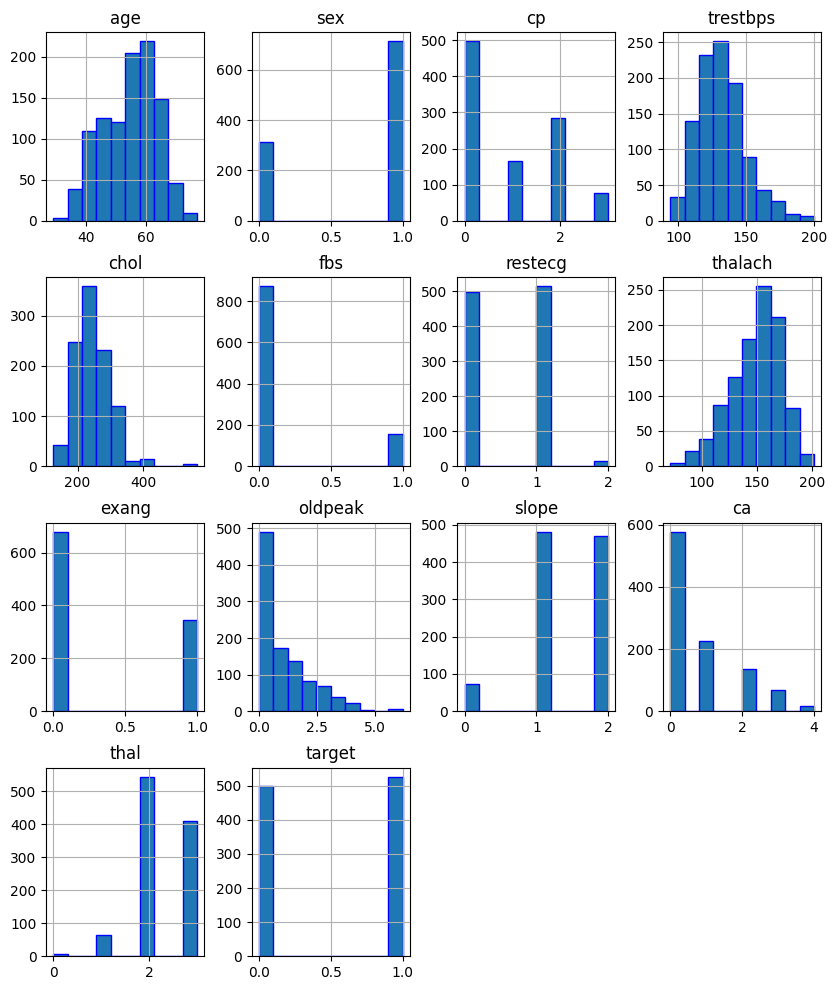

In [ ]:
df.hist(edgecolor="b",figsize=[10,12])

* It creates a bar chart that shows how many times each unique value in the "target" column appears.


<Axes: xlabel='target', ylabel='count'>

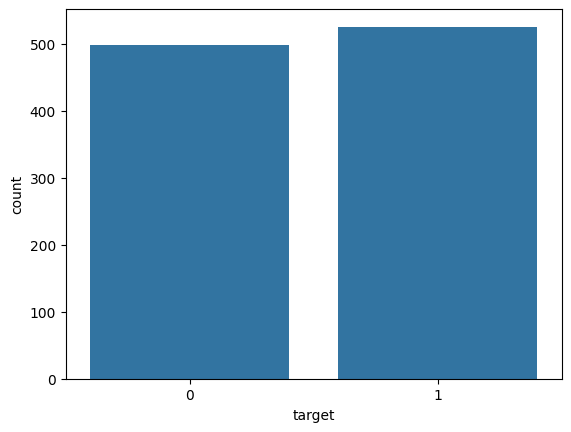

In [ ]:
sns.countplot(x="target",data=df)

# **5. Correlation Analysis**
* it find the correlation between columns in a dataset. Correlation measures how strongly two variables are related:

In [ ]:
correlation=df.corr()


* The heatmap helps you easily spot correlations between variables at a glance. Darker colors indicate stronger relationships, while lighter colors indicate weaker relationships.

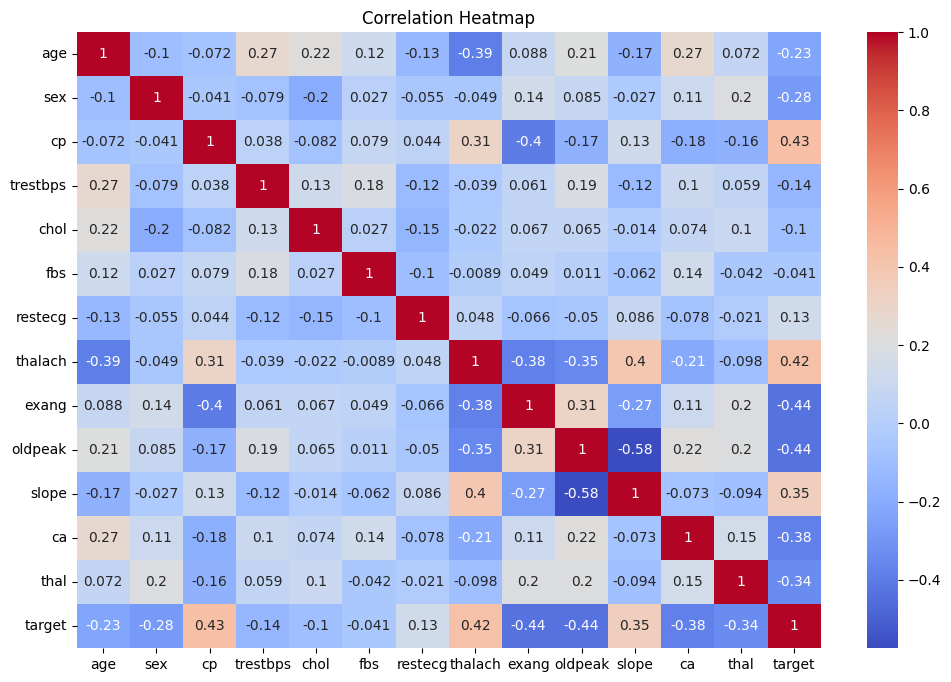

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

* Dropping columns based on their correlation with the target variable helps to simplify the model by removing features that aren't useful for prediction.

In [ ]:
df.drop(['age'],inplace=True,axis=1)
df.drop(['sex'],inplace=True,axis=1)
df.drop(['trestbps'],inplace=True,axis=1)
df.drop(['chol'],inplace=True,axis=1)
df.drop(['fbs'],inplace=True,axis=1)
df.drop(['restecg'],inplace=True,axis=1)

In [ ]:
df.shape

(1025, 8)

# **6. Outlier Detection**

* it is is useful for visually inspecting the distributions and identifying outliers in multiple numerical columns of a DataFrame.


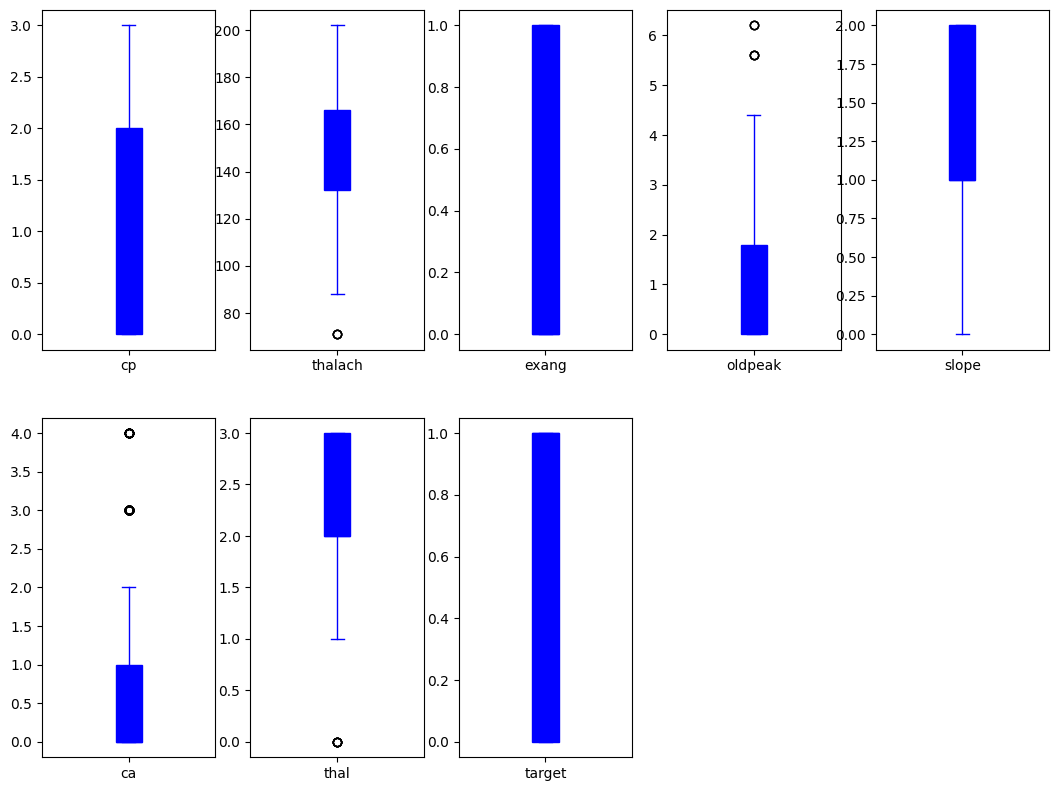

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

# **7. Feature Engineer**

* it helps reduce skewness

In [ ]:
data=np.log(df+1)

* creates a histogram to visualize the distribution of the log-transformed data.


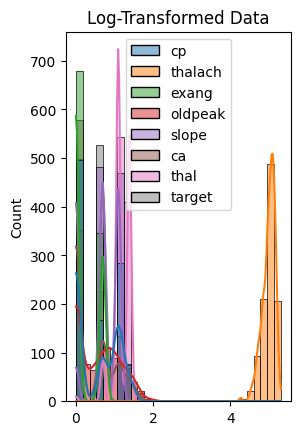

In [ ]:
# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

* creates a histogram to visualize the distribution of the log-transformed data.


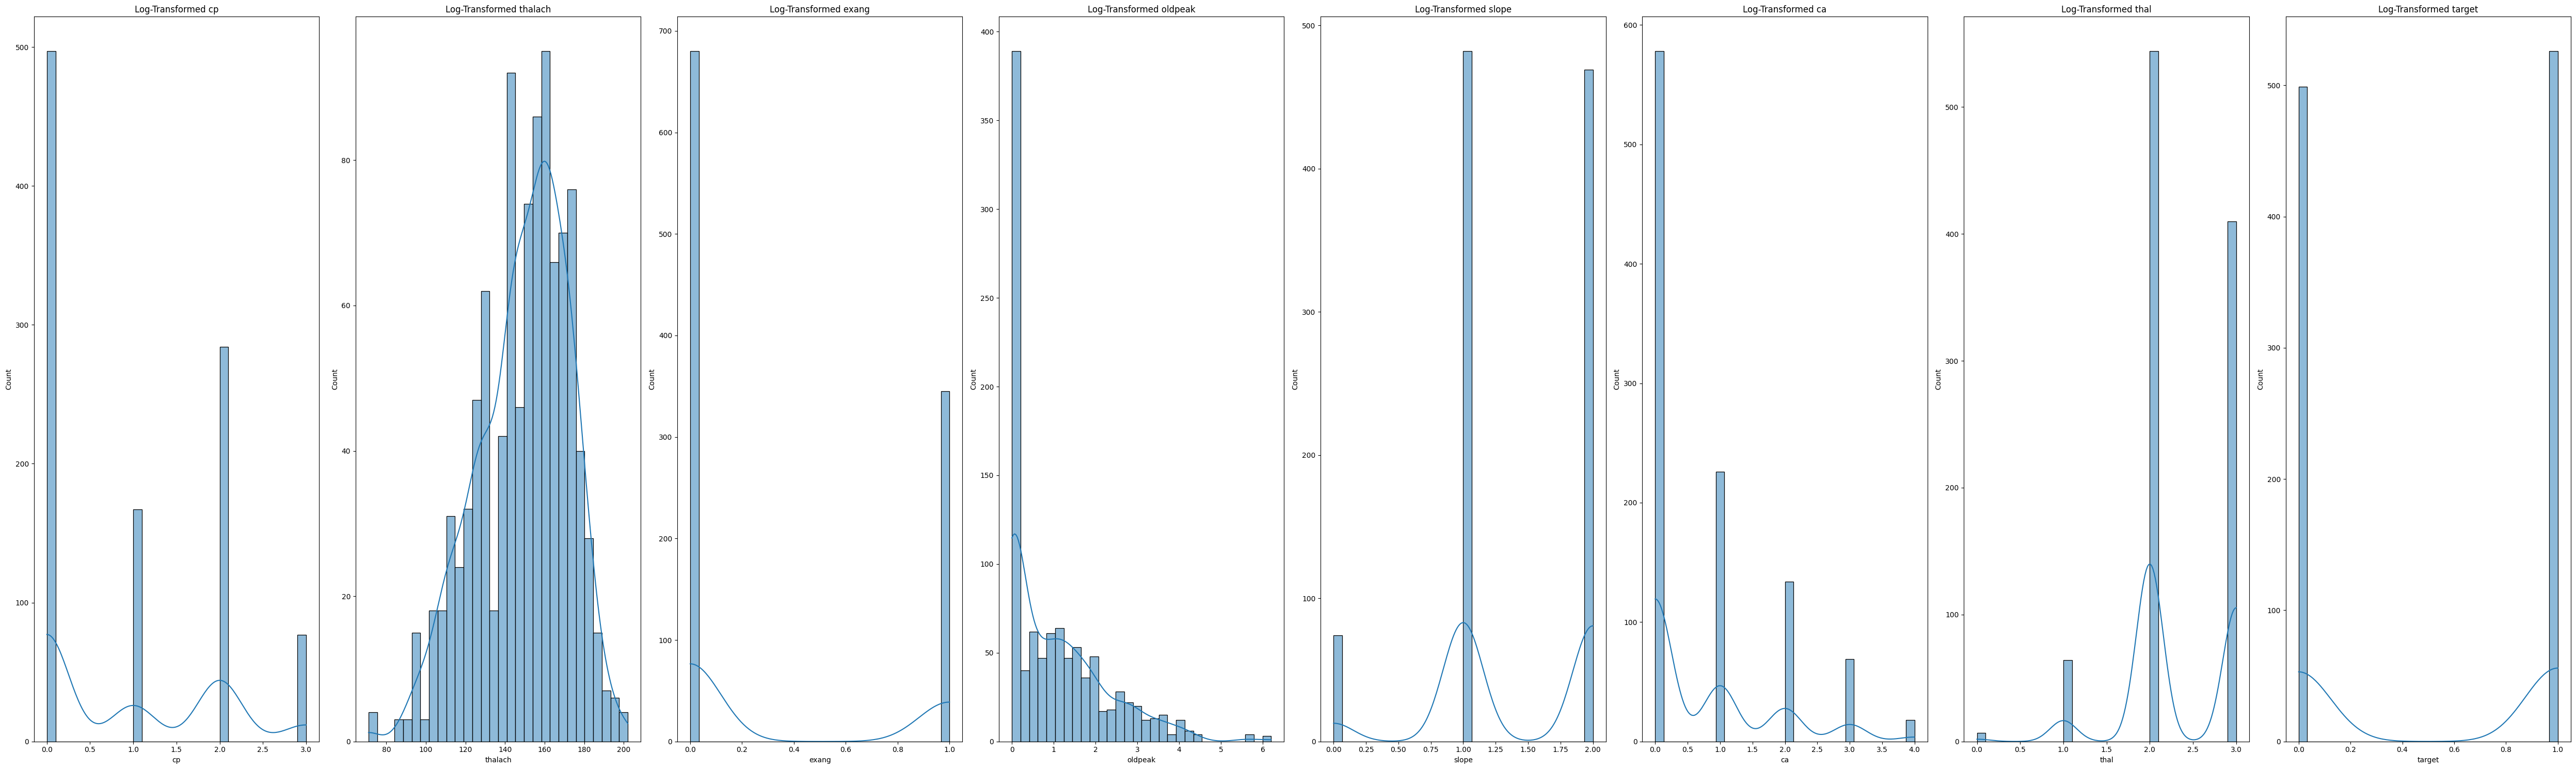

In [ ]:
# Assuming df is a DataFrame with multiple features
num_features = df.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(df.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], dtype='object')

# **8. Dimensionality Reduction**

* The first line prepares the target column for binary classification.
* The next two lines split the data into features (x) and target (y), which are used to train a machine learning model.








In [ ]:
data['target'] = (data['target'] > 0.5).astype(int)
x=data[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=data['target']

 # **10. Initial Modelling and Hypothesis Testing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier


* split your dataset into training and testing sets, which is a crucial step in building and evaluating machine learning models

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


* This code trains a Random Forest model using your training data, preparing it to make predictions on test or real-world data.








In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

 * model's best guesses for the outcomes based on the test data.

In [ ]:
y_pred=model.predict(x_test)
y_pred


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

* helps you assess how well your classification model has done in terms of predicting the correct categories (disease or no disease) and allows you to visualize where it makes errors.

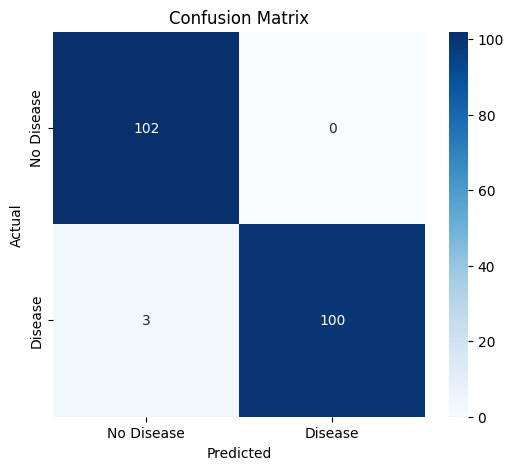

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* These metrics are used to understand how well a model is performing from different perspectives (precision, recall, balance, and overall accuracy). This helps identify areas for improvement based on the problem's needs.








In [ ]:
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))

print('Recall:', recall_score(y_test, y_pred, average="weighted"))

print('F1 Score:', f1_score(y_test, y_pred, average="weighted"))


Accuracy: 0.9853658536585366
Precision: 0.9857839721254356
Recall: 0.9853658536585366
F1 Score: 0.9853637641109759


* This code takes user input, predicts the likelihood of a heart condition, and displays the result.








In [ ]:
data

,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,0.000000,5.129899,0.000000,0.693147,1.098612,1.098612,1.386294,0
1,0.000000,5.049856,0.693147,1.410987,0.000000,0.000000,1.386294,0
2,0.000000,4.836282,0.693147,1.280934,0.000000,0.000000,1.386294,0
3,0.000000,5.087596,0.000000,0.000000,1.098612,0.693147,1.386294,0
4,0.000000,4.672829,0.000000,1.064711,0.693147,1.386294,1.098612,0
...,...,...,...,...,...,...,...,...
1020,0.693147,5.105945,0.693147,0.000000,1.098612,0.000000,1.098612,1
1021,0.000000,4.955827,0.693147,1.335001,0.693147,0.693147,1.386294,0
1022,0.000000,4.779123,0.693147,0.693147,0.693147,0.693147,1.098612,0
1023,0.000000,5.075174,0.000000,0.000000,1.098612,0.000000,1.098612,1


In [ ]:
cp=float(input("Enter cp:"))
thalach=float(input("Enter thalach:"))
exang=float(input("Enter exang:"))
oldpeak=float(input("Enter oldpeak:"))
slope=float(input("Enter slope:"))
ca=float(input("Enter ca:"))
thal=float(input("Enter thal:"))
user_input=[[cp,thalach,exang,oldpeak,slope,ca,thal]]
heart=model.predict(user_input)
print("heart: ",heart)

Enter cp:1
Enter thalach:2
Enter exang:3
Enter oldpeak:4
Enter slope:5
Enter ca:5
Enter thal:6
heart:  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
